<a href="https://colab.research.google.com/github/umiSirya/General-Data-analysis/blob/main/Heart2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#load the csv file
df = pd.read_csv('/content/heart_2022_with_nans.csv')
df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80836,Georgia,Male,Excellent,30.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.67,72.00,25.82,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,Yes
80837,Georgia,Female,Fair,3.0,30.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",Yes,...,1.63,65.77,24.89,No,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
80838,Georgia,Male,Good,0.0,25.0,Within past year (anytime less than 12 months ...,No,4.0,None of them,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80839,Georgia,Female,Very good,0.0,30.0,Within past 5 years (2 years but less than 5 y...,Yes,7.0,None of them,No,...,1.60,52.16,20.37,Yes,Yes,No,No,"Yes, received Tdap",No,Yes


# **Data Exploration**

In [7]:
df.isnull().sum()

,0
State,0
Sex,0
GeneralHealth,241
PhysicalHealthDays,2302
MentalHealthDays,1925
LastCheckupTime,1577
PhysicalActivities,221
SleepHours,1047
RemovedTeeth,3258
HadHeartAttack,669


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80841 entries, 0 to 80840
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      80841 non-null  object 
 1   Sex                        80841 non-null  object 
 2   GeneralHealth              80600 non-null  object 
 3   PhysicalHealthDays         78539 non-null  float64
 4   MentalHealthDays           78916 non-null  float64
 5   LastCheckupTime            79264 non-null  object 
 6   PhysicalActivities         80620 non-null  object 
 7   SleepHours                 79794 non-null  float64
 8   RemovedTeeth               77583 non-null  object 
 9   HadHeartAttack             80172 non-null  object 
 10  HadAngina                  79959 non-null  object 
 11  HadStroke                  80501 non-null  object 
 12  HadAsthma                  80463 non-null  object 
 13  HadSkinCancer              80169 non-null  obj

In [11]:
import missingno as msno

<Axes: >

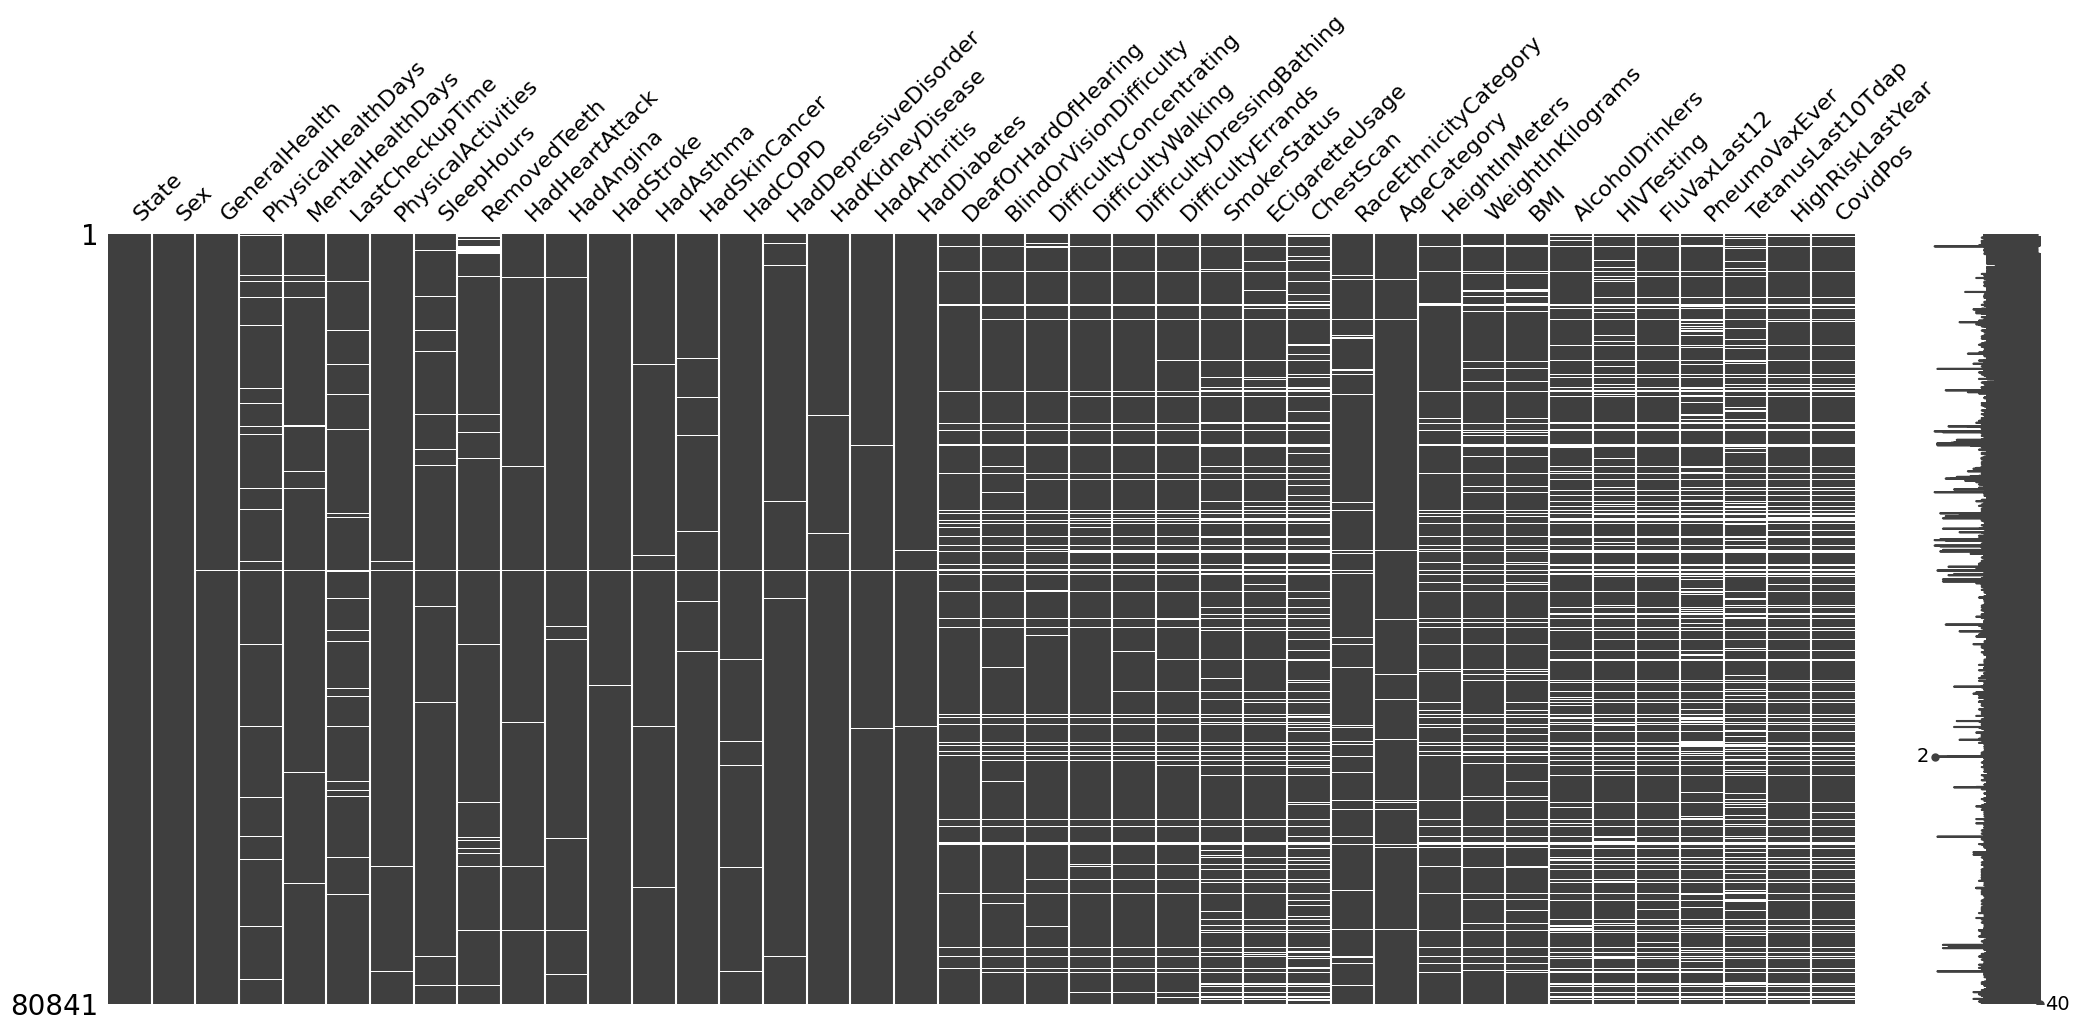

In [12]:
msno.matrix(df)

<Axes: >

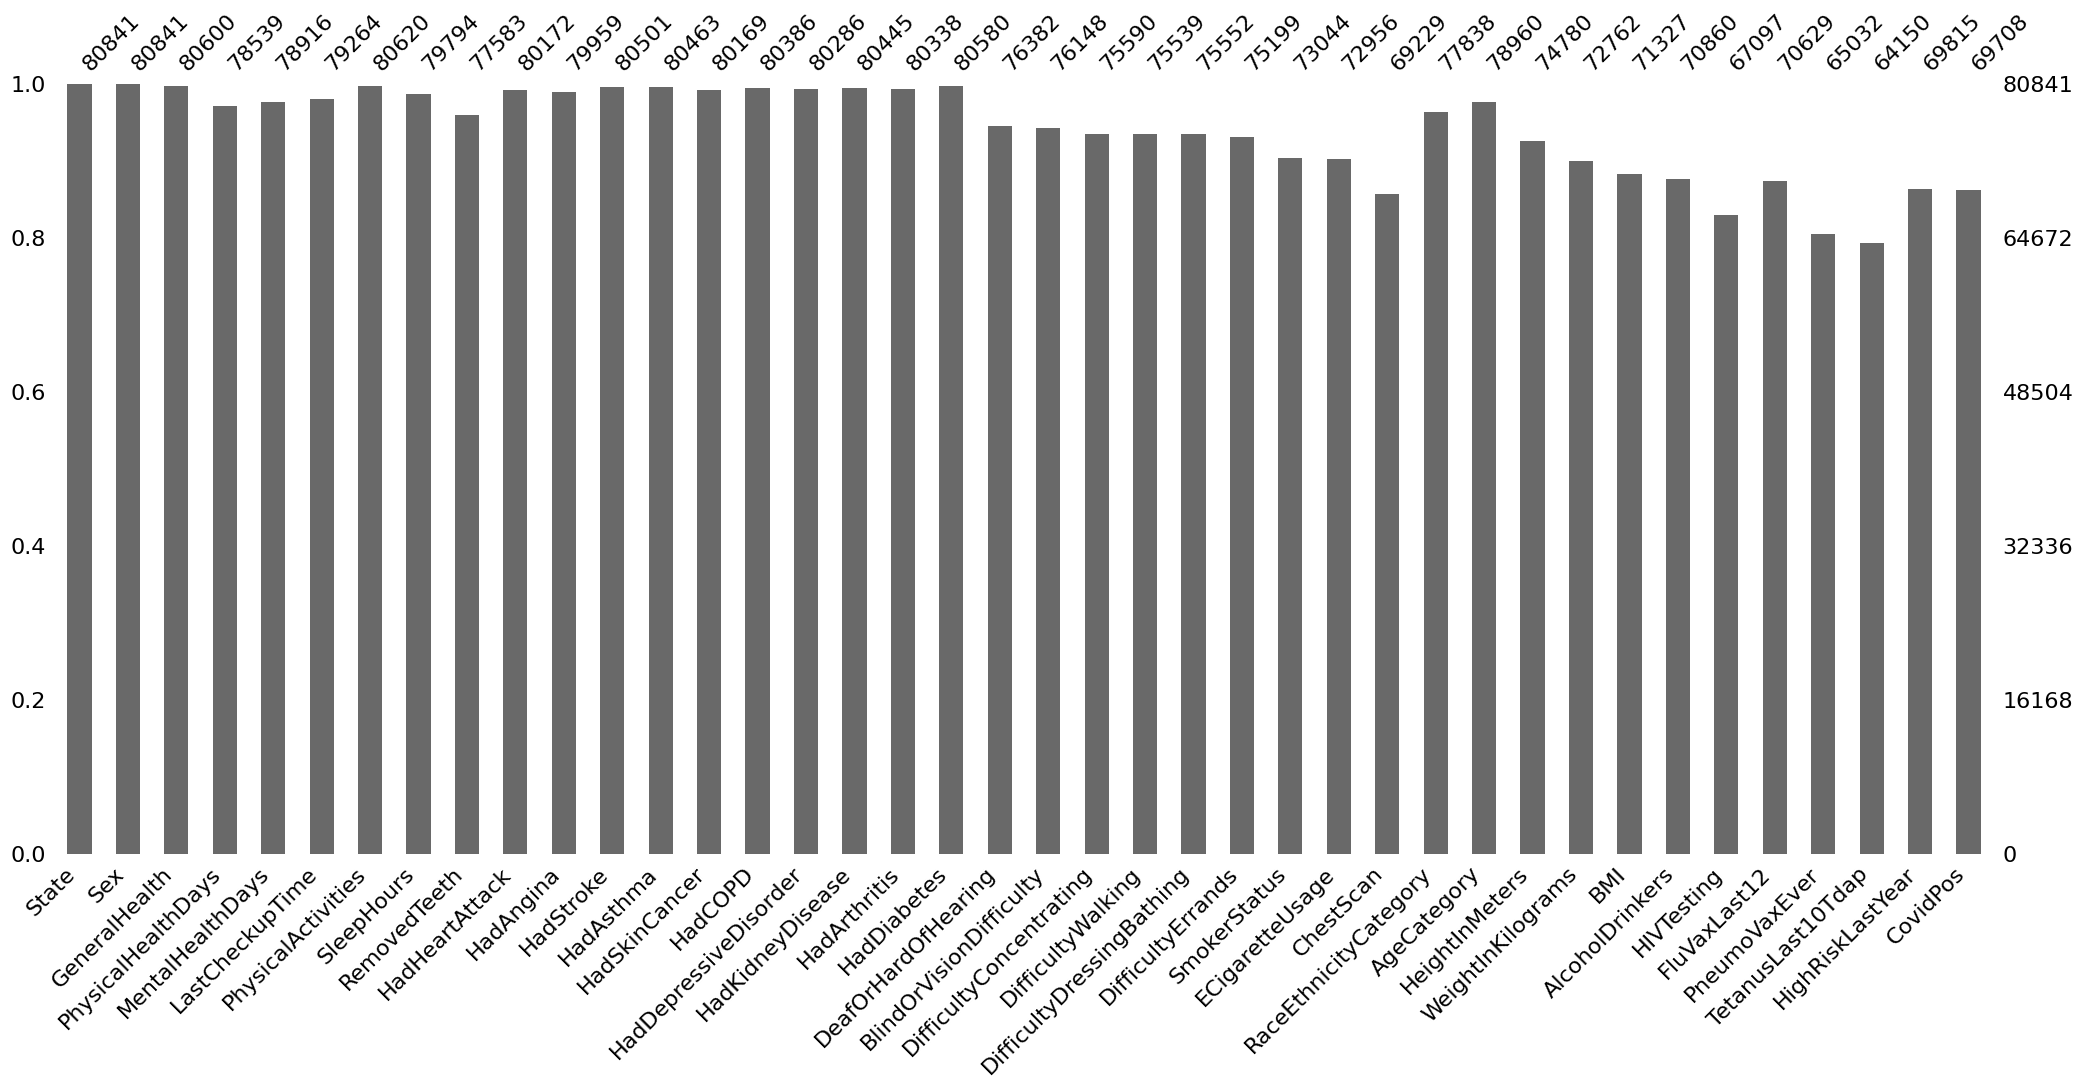

In [13]:
msno.bar(df)

In [15]:
df['GeneralHealth'].isnull().sum()

241

In [16]:
df.value_counts('GeneralHealth')

,count
GeneralHealth,
Very good,26518
Good,25621
Excellent,13623
Fair,11046
Poor,3792


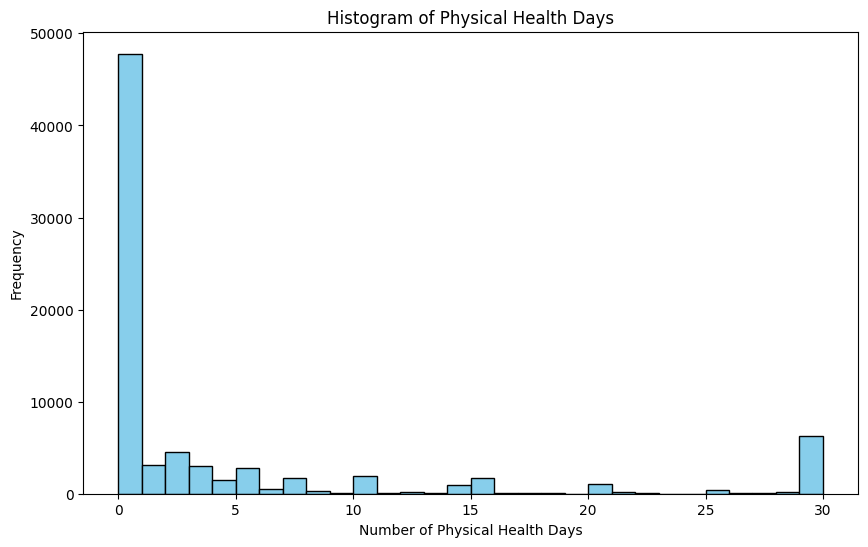

In [27]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['PhysicalHealthDays'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Number of Physical Health Days')
plt.ylabel('Frequency')
plt.title('Histogram of Physical Health Days')
plt.show()

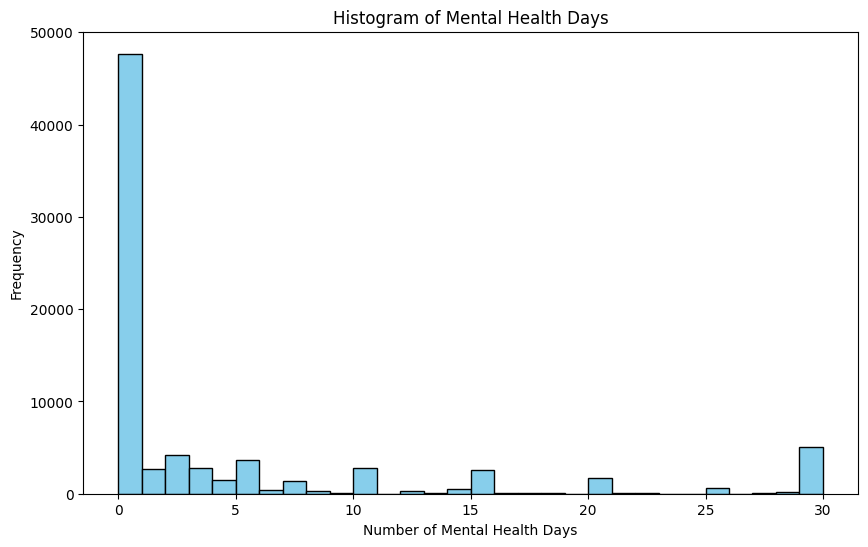

In [30]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['MentalHealthDays'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Number of Mental Health Days')
plt.ylabel('Frequency')
plt.title('Histogram of Mental Health Days')
plt.show()

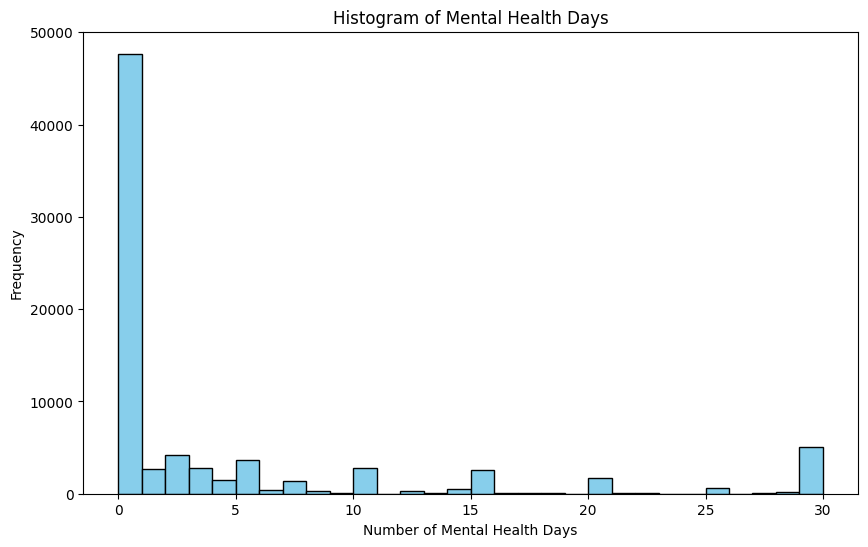

In [34]:
# Plotting the histogram(Mentalhealth days)
plt.figure(figsize=(10, 6))
plt.hist(df['MentalHealthDays'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Number of Mental Health Days')
plt.ylabel('Frequency')
plt.title('Histogram of Mental Health Days')
plt.show()

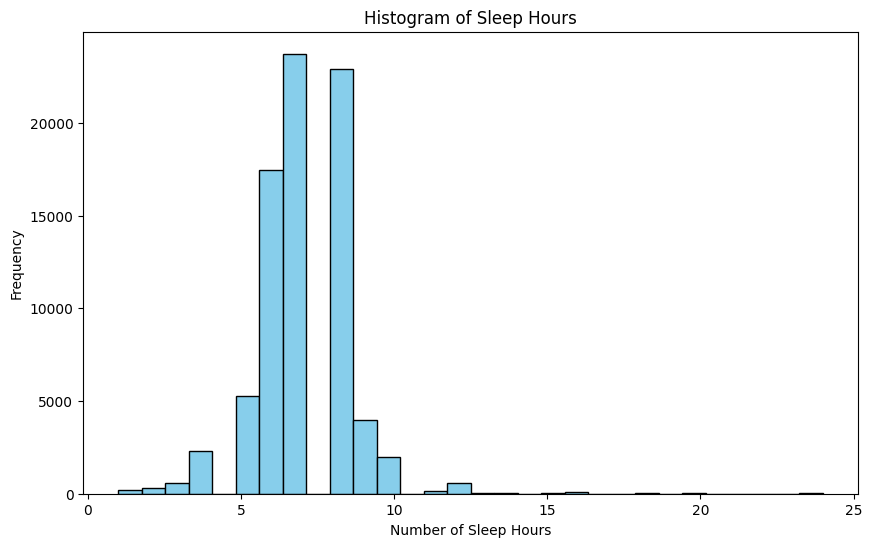

In [37]:
# Plotting the histogram(Sleep Hours)
plt.figure(figsize=(10, 6))
plt.hist(df['SleepHours'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Number of Sleep Hours')
plt.ylabel('Frequency')
plt.title('Histogram of Sleep Hours')
plt.show()

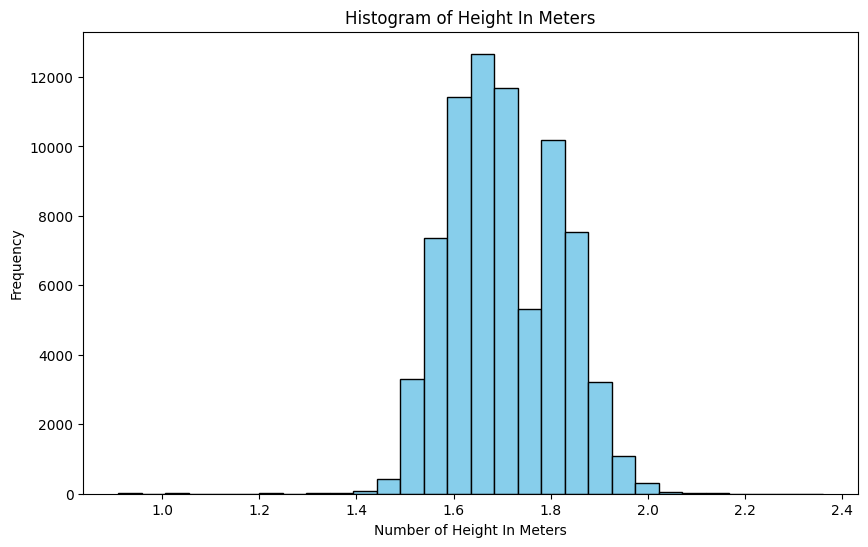

In [67]:
# Plotting the histogram(Height In Meters)
plt.figure(figsize=(10, 6))
plt.hist(df['HeightInMeters'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Number of Height In Meters')
plt.ylabel('Frequency')
plt.title('Histogram of Height In Meters')
plt.show()

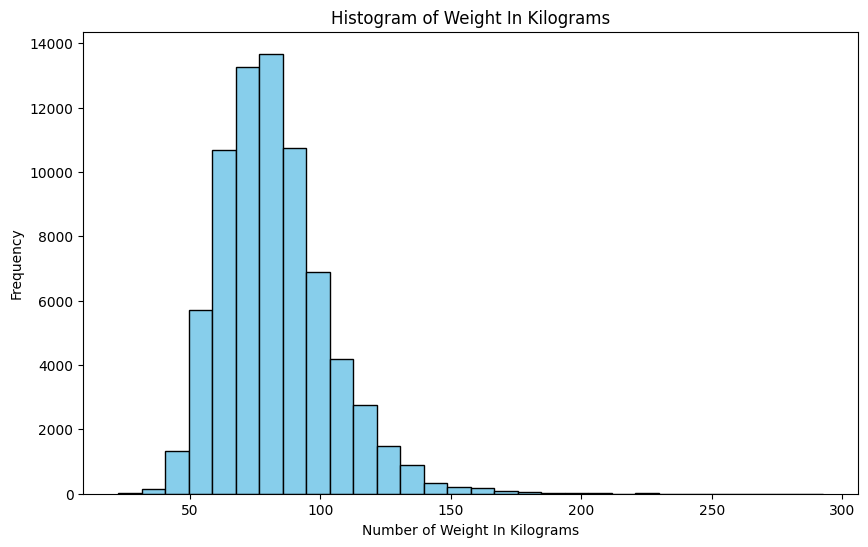

In [69]:
# Plotting the histogram(Weight In Kilograms)
plt.figure(figsize=(10, 6))
plt.hist(df['WeightInKilograms'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Number of Weight In Kilograms')
plt.ylabel('Frequency')
plt.title('Histogram of Weight In Kilograms')
plt.show()

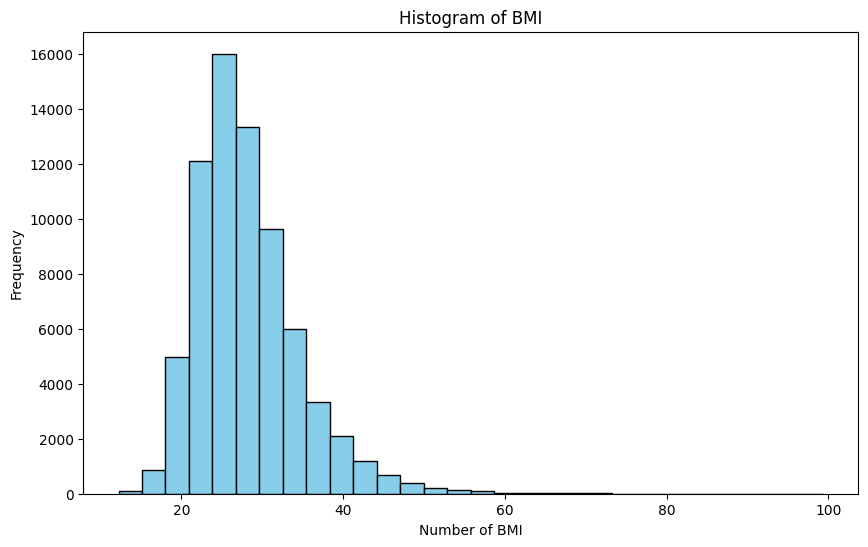

In [71]:
# Plotting the histogram(BMI)
plt.figure(figsize=(10, 6))
plt.hist(df['BMI'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Number of BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI')
plt.show()

<Axes: >

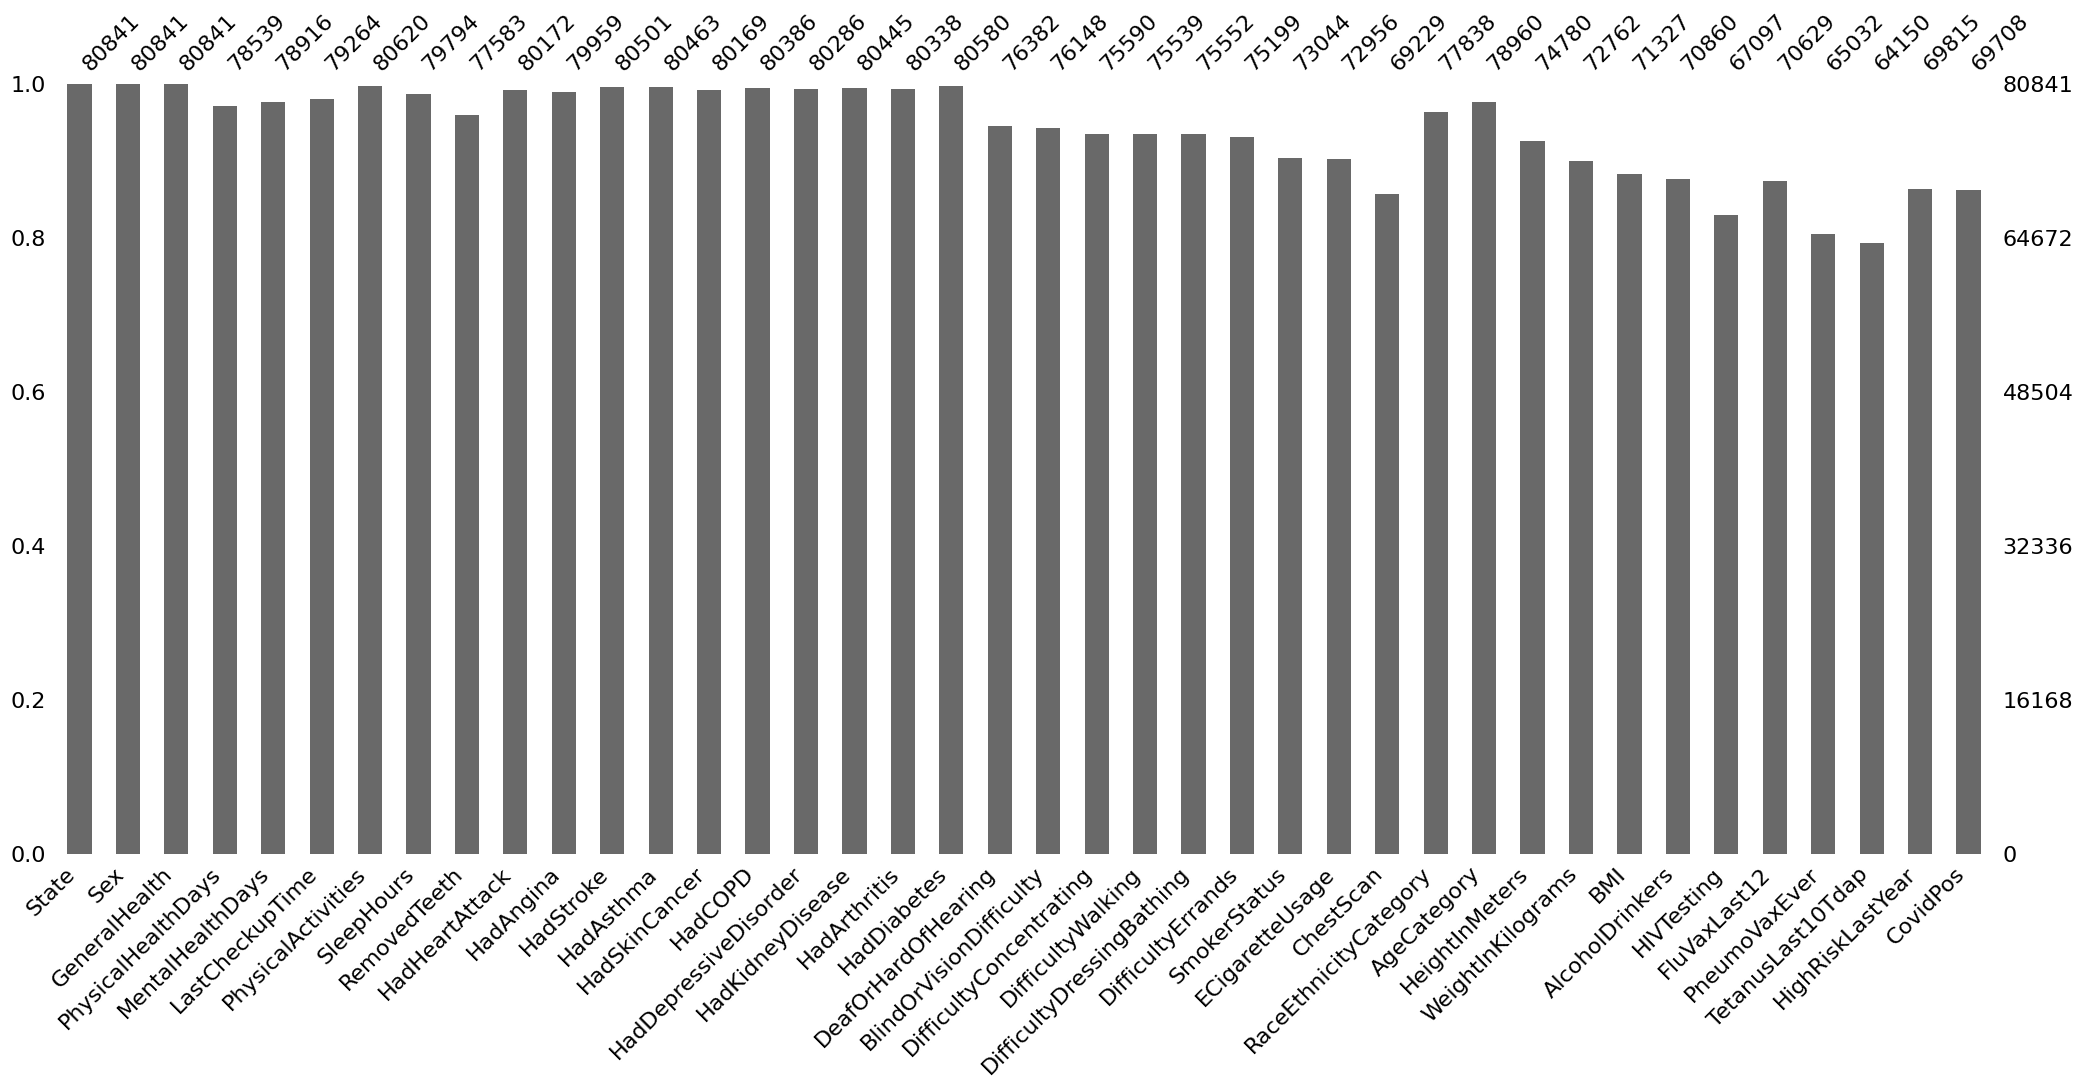

In [76]:
msno.bar(df)

<Axes: >

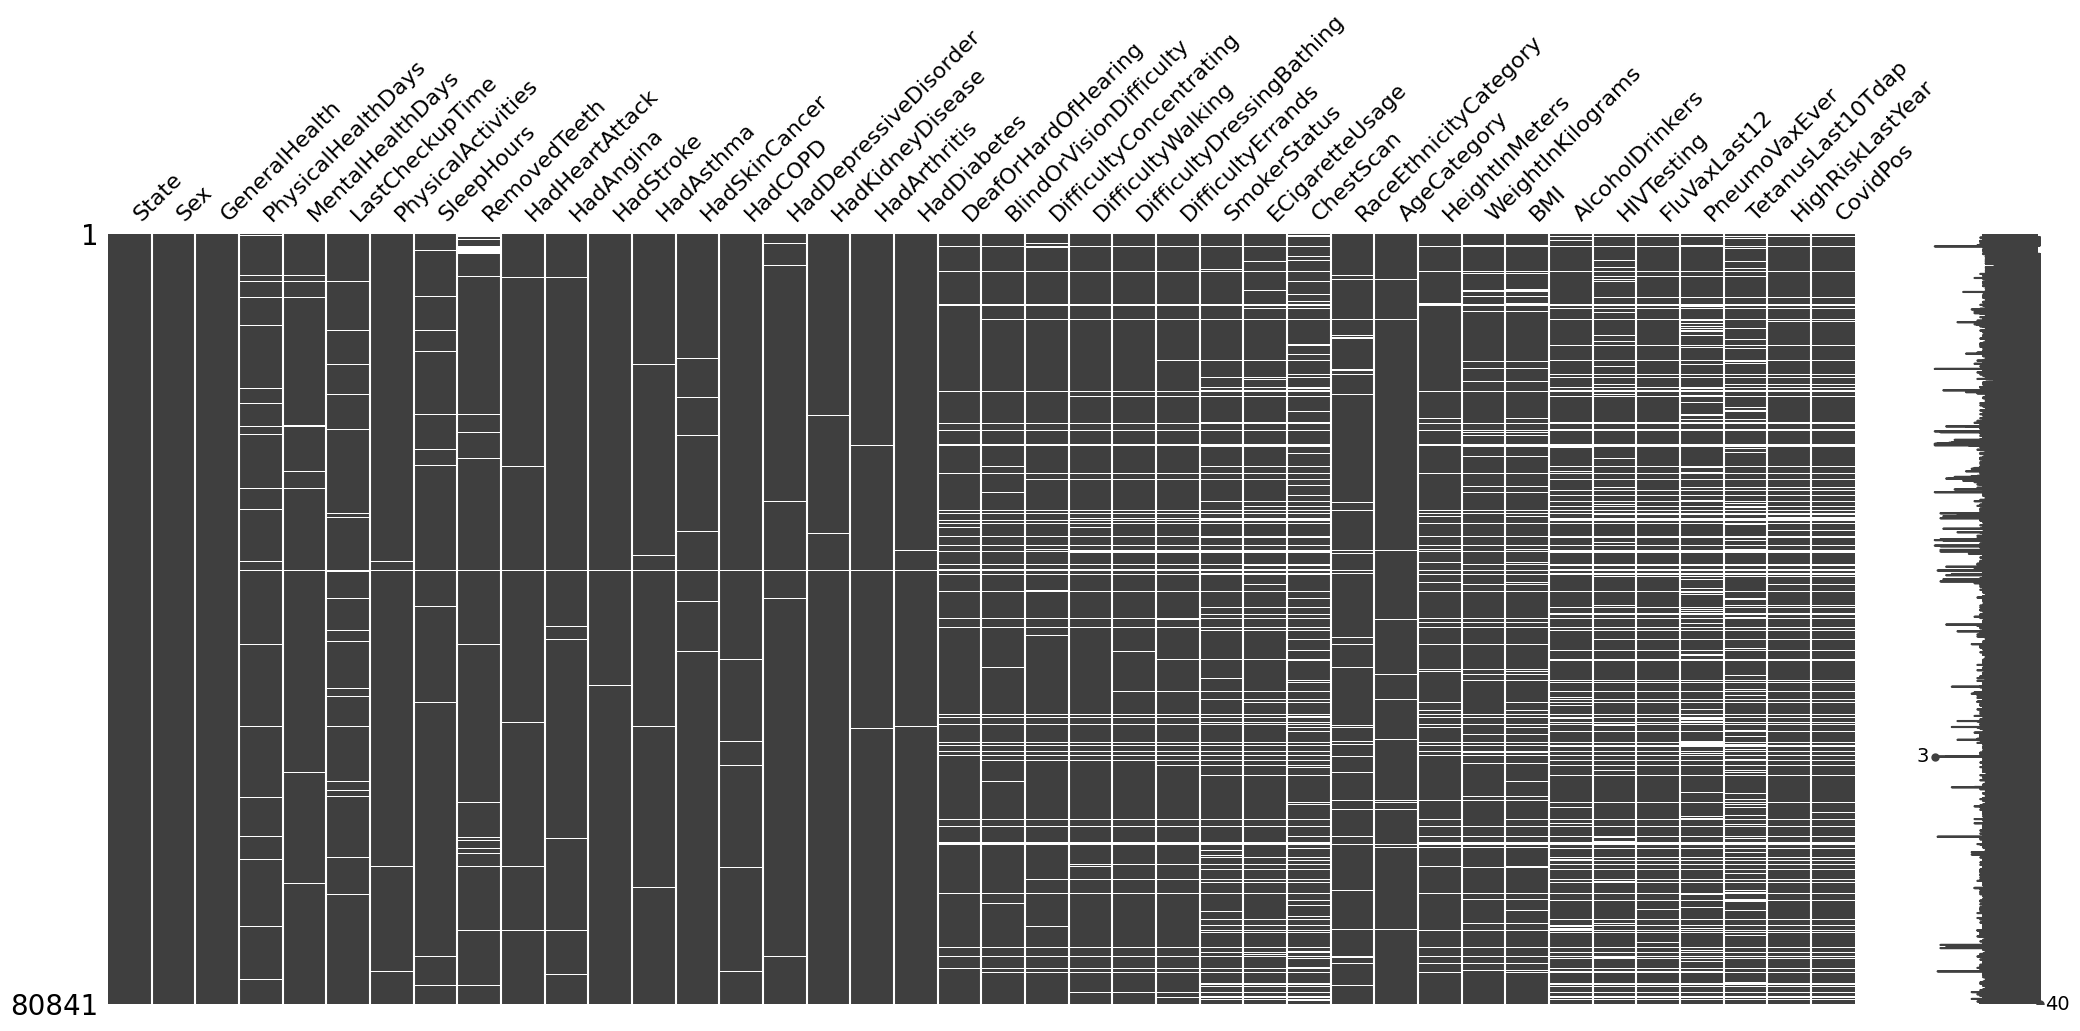

In [33]:
msno.matrix(df)

In [94]:
df['HadDiabetes'].value_counts()

,count
HadDiabetes,
No,67019
Yes,11110
"No, pre-diabetes or borderline diabetes",1830
"Yes, but only during pregnancy (female)",621


# **Data Cleaning**

In [99]:
# Define a list of column names where missing values will be filled with the mean of the column
numerical_data_mean =['SleepHours','HeightInMeters','WeightInKilograms','BMI']

# Fill missing values in the specified columns with the mean
for column in numerical_data_mean:
    df[column] = df[column].fillna(df[column].mean())
# Define a list of column names where missing values will be filled with the median of the column
numerical_data_median =['PhysicalHealthDays','MentalHealthDays']

# Fill missing values in the specified columns with the median
for column in numerical_data_median:
    df[column] = df[column].fillna(df[column].median())

#Filling the 1 entry where age is Ag with mode

# Calculate the mode of the Age column
mode_age = df['AgeCategory'].mode()[0]

# Replace 'AG' in the Age column with the mode value
df['AgeCategory'] = df['AgeCategory'].replace('Ag', mode_age)

# List of categorical columns in the dataset that need missing values filled with mode
categorical_columns = [
    'GeneralHealth','LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack',
    'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
    'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing',
    'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking',
    'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage',
    'ChestScan', 'RaceEthnicityCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
    'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos',
    'AgeCategory', 'HadDiabetes'
]

# Loop through each column in the list
for column in categorical_columns:
    # Get the mode (most frequent value) for the current column
    mode_value = df[column].mode()[0]  # mode()[0] returns the most frequent value (mode)

    # Fill missing (NaN) values in the column with the mode value
    df[column].fillna(mode_value)  # inplace=True modifies the DataFrame directly

#checking for Null values in dataset
df.isnull().sum()




,0
State,0
Sex,0
GeneralHealth,0
PhysicalHealthDays,0
MentalHealthDays,0
LastCheckupTime,0
PhysicalActivities,0
SleepHours,0
RemovedTeeth,0
HadHeartAttack,0


In [100]:
#check for duplicate columns but wont make sense to remove them
df.duplicated().sum()

68

# **Data Visualisation**

In [102]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

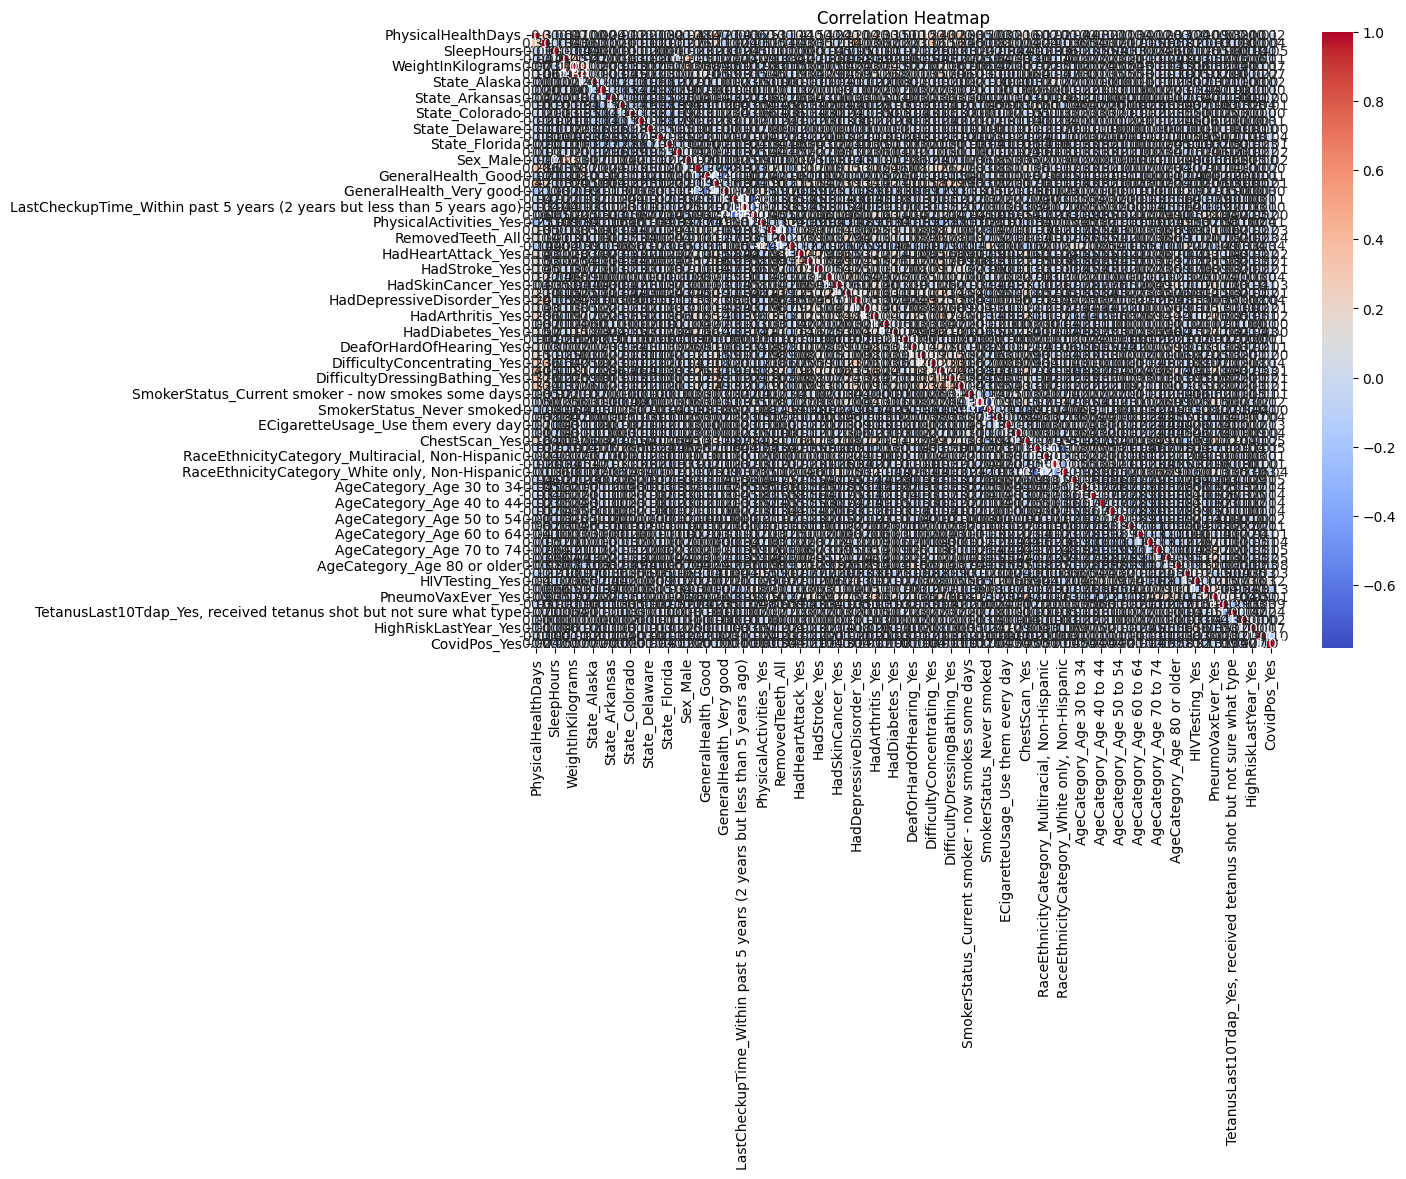

In [103]:
df_encoded = pd.get_dummies(df, drop_first=True)  # One-hot encoding for categorical columns

correlation_matrix = df_encoded.corr()  # Calculate the correlation matrix
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')  # Add a title
plt.show()